In [1]:
import os
import json
import numpy as np
import splitfolders
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [2]:
batch_size = 32
img_width, img_height = 256, 256

In [3]:
dataset = tf.keras.utils.image_dataset_from_directory('MaizeLeafDataset',
                                                  batch_size=32,
                                                  image_size=(256, 256),
                                                  shuffle=True,
                                                  )

Found 8852 files belonging to 5 classes.


In [4]:
class_names = dataset.class_names
class_names

['Common Rust',
 'Gray Leaf Spot',
 'Healthy',
 'Northern Leaf Blight',
 'Not Maize Leaf']

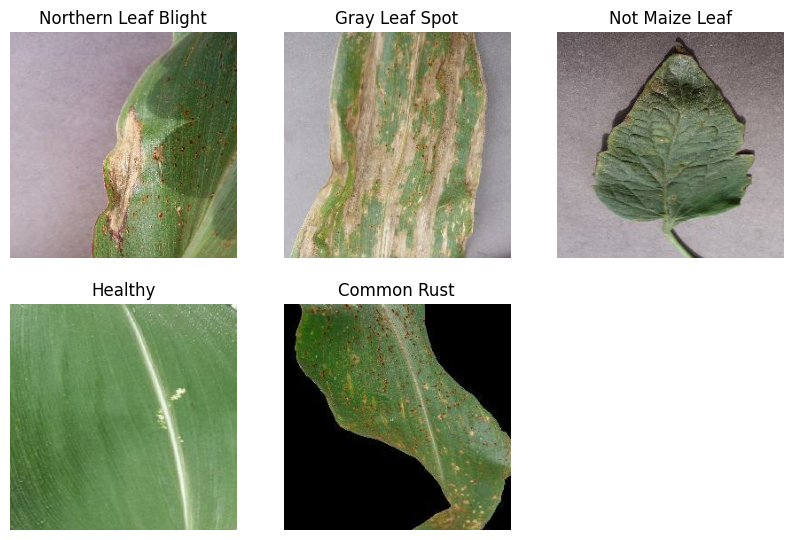

In [5]:
plt.figure(figsize=(10, 10))
class_counts = {class_name: 0 for class_name in class_names} 
display_limit = 1  
for img_batch, label_batch in dataset.take(6): 
    for i in range(len(img_batch)):
        class_name = class_names[label_batch[i]]
        if class_counts[class_name] < display_limit:
            ax = plt.subplot(3, 3, sum(class_counts.values()) + 1)
            plt.imshow(img_batch[i].numpy().astype("uint8"))
            plt.title(class_name)
            plt.axis("off")
            class_counts[class_name] += 1
        if sum(class_counts.values()) >= len(class_names):
            break
    if sum(class_counts.values()) >= len(class_names):
        break
plt.show()

In [6]:
dir1 = 'MaizeLeafDataset'
dir2 = 'MaizeLeafDataset2'
os.listdir(dir2)

[]

In [7]:
splitfolders.ratio(dir1, 
                  output=dir2,
                  seed=27,
                  ratio=(0.8, 0.1, 0.1),
                  group_prefix=None)

In [8]:
train_path = dir2+'\\train\\'
test_path = dir2+'\\test\\'
validation_path = dir2+'\\val\\'

In [13]:
image_gen = ImageDataGenerator(rotation_range=10, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1.0/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest' 
                              )

In [14]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=(256, 256),
                                                color_mode='rgb',
                                                batch_size=32,
                                                class_mode='sparse'
                                               )

Found 7079 images belonging to 5 classes.


In [15]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=(256, 256),
                                               color_mode='rgb',
                                               batch_size=32,
                                               class_mode='sparse')

Found 891 images belonging to 5 classes.


In [16]:
validation_image_gen = image_gen.flow_from_directory(validation_path,
                                                     target_size=(256, 256),
                                                     color_mode='rgb',
                                                     batch_size=32,
                                                     class_mode='sparse')

Found 882 images belonging to 5 classes.


In [25]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))    
   
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))    
   
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))    
    
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))    

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(5))
model.add(Activation('softmax'))

C:\Users\farma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 5)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,221 (614.14 KB)

 Trainable params: 157,221 (614.14 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

In [28]:
hist = model.fit(train_image_gen,
                 epochs=50,
                 validation_data=validation_image_gen,
                 batch_size=32,
                 verbose=1
                )

Epoch 1/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5055 - loss: 1.1187  

C:\Users\farma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


222/222 ━━━━━━━━━━━━━━━━━━━━ 484s 2s/step - accuracy: 0.5063 - loss: 1.1172 - val_accuracy: 0.8515 - val_loss: 0.3786
Epoch 2/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 364s 2s/step - accuracy: 0.8741 - loss: 0.3412 - val_accuracy: 0.8583 - val_loss: 0.3442
Epoch 3/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 364s 2s/step - accuracy: 0.8946 - loss: 0.2622 - val_accuracy: 0.9161 - val_loss: 0.2224
Epoch 4/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 364s 2s/step - accuracy: 0.9235 - loss: 0.2070 - val_accuracy: 0.9422 - val_loss: 0.1563
Epoch 5/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 366s 2s/step - accuracy: 0.9434 - loss: 0.1577 - val_accuracy: 0.9546 - val_loss: 0.1265
Epoch 6/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 364s 2s/step - accuracy: 0.9412 - loss: 0.1528 - val_accuracy: 0.9535 - val_loss: 0.1326
Epoch 7/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step - accuracy: 0.9493 - loss: 0.1376 - val_accuracy: 0.9524 - val_loss: 0.1381
Epoch 8/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 370s 2s/step - accuracy: 0.9476 - loss: 0.1364 - val_accuracy: 0.952

In [29]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

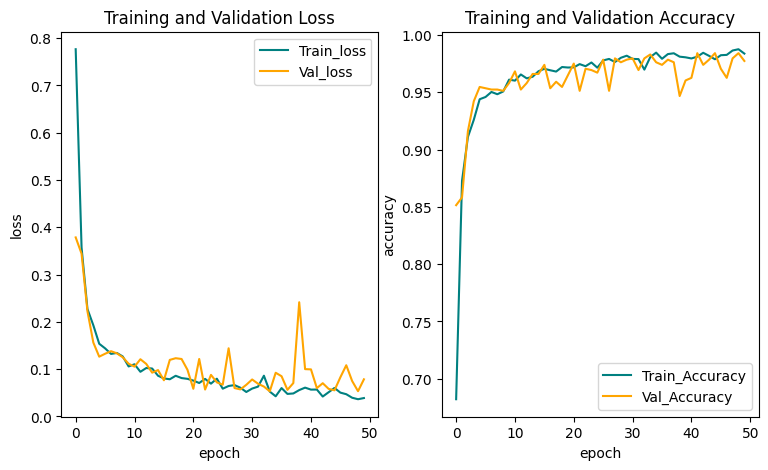

In [30]:
plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], color='teal', label='Train_loss')
plt.plot(hist.history['val_loss'], color='orange', label='Val_loss')
plt.title('Training and Validation Loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], color='teal', label='Train_Accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='Val_Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()

plt.show()

In [31]:
test_loss, test_acc=model.evaluate(test_image_gen)
print('Test Accuracy:', test_acc*100)
print('Test Loss:', test_loss*100)

28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 628ms/step - accuracy: 0.9704 - loss: 0.0926
Test Accuracy: 97.97979593276978
Test Loss: 8.025096356868744


In [32]:
class_indices = {v: k for k, v in train_image_gen.class_indices.items()}
class_indices

{0: 'Common Rust',
 1: 'Gray Leaf Spot',
 2: 'Healthy',
 3: 'Northern Leaf Blight',
 4: 'Not Maize Leaf'}

In [33]:
import json
json.dump(class_indices, open('class_indices.json', 'w'))

actual label: Not Maize Leaf
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
predicted label: Not Maize Leaf


NameError: name 'prediction' is not defined

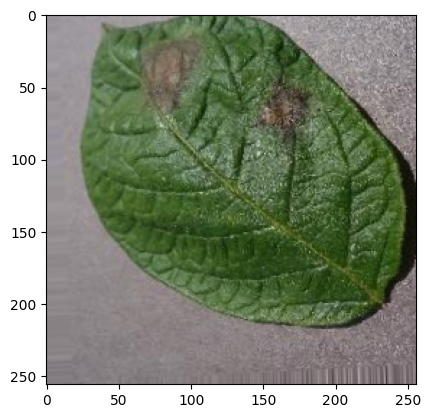

In [41]:
for image_batch, label_batch in test_image_gen:
    img_1 = image_batch[0]
    label_1 = int(label_batch[0])
    plt.imshow(img_1)
    print("actual label:",class_names[label_1])
    
    batch_pred = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_pred[0])])
    confidence = np.max(prediction[0]) * 100
    print(f"Confidence: {confidence:.2f}%")
    
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


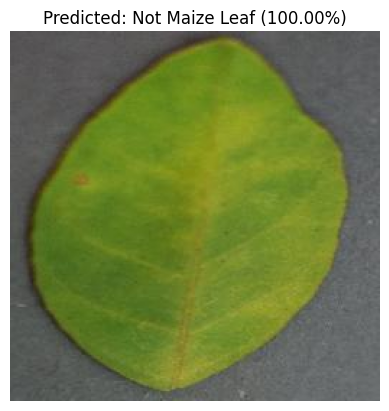

Predicted Label: Not Maize Leaf
Confidence: 100.00%


In [39]:
from PIL import Image
def classify_single_image(image_path):
    # Load the image
    img = Image.open(image_path)
    img = img.resize((256, 256))  # Resize to match model's input shape
    img_array = np.array(img) / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction[0])
    confidence = np.max(prediction[0]) * 100  # Get confidence score

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {class_names[predicted_class]} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

    # Print results
    print(f"Predicted Label: {class_names[predicted_class]}")
    print(f"Confidence: {confidence:.2f}%")

# Path to the image you want to classify
image_path = 'MaizeLeafDataset/Not Maize Leaf/NotMaizeLeaf (8).JPG'  # Updated path

# Run the classification
classify_single_image(image_path)

In [40]:
model.save('maize-leaf-disease-model.h5')